In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('train.csv')
train_helper = pd.read_csv('train_helper.csv')
test = pd.read_csv('test.csv')
test_helper = pd.read_csv('test_helper.csv')

In [3]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,CUID449,TID325283,EID430976,41.75000,2020-09-06 03:42:03,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03 00:00:00
233629,CUID449,TID314228,EID2012983,83.50000,2020-08-19 04:43:01,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03 00:00:00
233630,CUID449,TID318682,EID1776806,41.75000,2020-08-26 05:51:17,391083,A,BA431477,BB282621,PD206909,CC1,CP443835,0,2019-02-03 00:00:00
233631,CUID449,TID9480,EID631635,167.00000,2020-04-15 20:35:21,53,E,BA447678,BB447445,PD0,CC1,CP443835,0,2020-04-16 00:00:00


In [3]:
train_helper

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID1626,EID1390067,B170291,A,2017-11-18 05:26:58,117.167.140.162,875,1525792,77.55,NaN
1,CUID2932,EID397864,B170291,A,2017-11-18 05:26:59,133.193.46.52,875,471293,-25.85,NaN
2,CUID7230,EID315534,B1827073,B,2017-11-18 05:27:02,127.75.140.137,875,825535,NaN,373.50
3,CUID1588,EID1724187,B170291,A,2017-11-18 05:27:30,120.210.191.123,875,2136427,-23.50,NaN
4,CUID3625,EID637357,B2356022,B,2017-11-18 05:27:55,127.75.145.110,875,825535,169.20,400.06
...,...,...,...,...,...,...,...,...,...,...
1231195,CUID2262,EID2048672,B170291,A,2018-06-15 13:52:00,40.97.78.142,875,3679,-25.85,NaN
1231196,CUID2262,EID2048672,B1827073,B,2018-06-15 13:52:27,40.97.78.142,875,3679,NaN,585.98
1231197,CUID1121,EID980064,B170291,A,2018-06-15 13:53:21,121.57.51.162,875,1777813,54.05,NaN
1231198,CUID2262,EID1769567,B170291,A,2018-06-15 13:53:29,40.97.78.142,875,3679,-25.85,NaN


In [4]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,CUID6660,TID198043,EID908838,4154.12500,13-08-2020 08:41,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
1,CUID6660,TID312736,EID502971,8350.00000,17-08-2020 04:13,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
2,CUID6660,TID308818,EID231193,20.87500,11-08-2020 01:40,363981,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
3,CUID6660,TID321252,EID1124129,20457.50000,30-08-2020 22:11,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
4,CUID6660,TID420788,EID908838,4154.12500,13-08-2020 08:40,33227,A,BA4811,BB68389,PD39402,CC1,CP0,11-08-2020 00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,01-07-2020 05:20,380044,A,BA11135,BB68920,PD57769,CC1,CP443935,23-05-2020 00:00
215848,CUID1447,TID250595,EID1438371,41.74165,09-05-2020 11:18,380044,A,BA11135,BB68920,PD14453,CC1,CP443935,30-04-2020 00:00
215849,CUID1447,TID401706,EID1645339,83.50000,13-07-2020 20:45,380044,A,BA376237,BB189059,PD13526,CC1,CP443935,14-07-2020 00:00
215850,CUID1447,TID312292,EID2054990,80.16000,15-08-2020 11:11,380044,A,BA377591,BB171054,PD35695,CC1,CP443935,02-09-2019 00:00


In [5]:
test_helper

,V1,V3,V14,V15,V16,V17,V18,V19,V20,V21
0,CUID3258,EID1709316,B170291,A,2018-01-16 13:55:17,168.160.152.82,875,498795,94.00,NaN
1,CUID2835,EID339299,B170291,A,2018-01-16 13:55:18,121.122.132.145,875,33514,129.25,NaN
2,CUID1750,EID342176,B170291,A,2018-01-16 13:56:23,183.207.164.149,875,2136427,98.70,NaN
3,CUID103,EID1507511,B4995,A,2018-01-16 13:56:37,123.143.40.203,875,1730685,96.35,NaN
4,CUID1750,EID342176,B1827073,B,2018-01-16 13:56:46,183.207.164.149,875,2136427,NaN,63.91
...,...,...,...,...,...,...,...,...,...,...
1160945,CUID993,EID79879,B170291,A,2018-07-16 04:17:06,129.46.123.166,875,1058753,30.55,NaN
1160946,CUID835,EID1951008,B126692,C,2018-07-16 04:17:10,140.104.180.167,875,2136427,NaN,NaN
1160947,CUID835,EID1951008,B126692,C,2018-07-16 04:17:13,140.104.180.167,875,2136427,NaN,NaN
1160948,CUID3739,EID1000040,B170291,A,2018-07-16 04:17:28,116.109.64.138,875,33514,124.55,NaN


In [4]:
train.isnull().sum()

V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
Target       0
V13       1871
dtype: int64

In [5]:
test.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13    2761
dtype: int64

In [6]:
train["Target"].value_counts()

Target
0    232343
1      1290
Name: count, dtype: int64

In [7]:
df = pd.concat([train, test])

In [8]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,CUID1872,TID229526,EID2062082,485.69445,2020-03-20 22:51:30,376474,A,BA1,BB425559,PD44707,CC1,CP0,0.0,2020-03-21 00:00:00
1,CUID5533,TID244499,EID1459012,393.45200,2020-04-28 07:17:12,33227,A,BA4793,BB248012,PD39453,CC1,CP0,0.0,2020-04-28 00:00:00
2,CUID5278,TID311877,EID0,375.75000,2020-08-15 04:11:43,0,F,BA5631,BB166256,PD237664,CC1,CP0,0.0,NaN
3,CUID24,TID279685,EID0,6.97225,2020-06-26 01:11:42,0,C,BA7188,BB354924,PD99032,CC1,CP0,0.0,NaN
4,CUID449,TID104689,EID0,16.70000,2020-09-15 10:11:06,0,C,BA7236,BB354924,PD63422,CC1,CP0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,CUID1447,TID282851,EID2057828,125.24165,01-07-2020 05:20,380044,A,BA11135,BB68920,PD57769,CC1,CP443935,NaN,23-05-2020 00:00
215848,CUID1447,TID250595,EID1438371,41.74165,09-05-2020 11:18,380044,A,BA11135,BB68920,PD14453,CC1,CP443935,NaN,30-04-2020 00:00
215849,CUID1447,TID401706,EID1645339,83.50000,13-07-2020 20:45,380044,A,BA376237,BB189059,PD13526,CC1,CP443935,NaN,14-07-2020 00:00
215850,CUID1447,TID312292,EID2054990,80.16000,15-08-2020 11:11,380044,A,BA377591,BB171054,PD35695,CC1,CP443935,NaN,02-09-2019 00:00


In [9]:
df['V13'].value_counts()

V13
2020-03-18 00:00:00    1376
2020-04-11 00:00:00    1224
2020-03-19 00:00:00     979
2020-04-03 00:00:00     945
2019-03-10 00:00:00     943
                       ... 
25-07-2013 00:00          1
03-05-2015 00:00          1
08-05-2012 00:00          1
26-05-2013 00:00          1
2007-02-13 00:00:00       1
Name: count, Length: 5859, dtype: int64

In [10]:
df.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
Target    215852
V13         4632
dtype: int64

In [11]:
df.dtypes

V1         object
V2         object
V3         object
V4        float64
V5         object
V6          int64
V7         object
V8         object
V9         object
V10        object
V11        object
V12        object
Target    float64
V13        object
dtype: object

In [12]:
df.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
Target    215852
V13         4632
dtype: int64

In [13]:
y = df["Target"]

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [15]:
# Label encode categorical features
label_cols = ['V1', 'V2', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12','V13']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Scale numerical features
num_cols = ['V4', 'V6','V1', 'V2', 'V3', 'V5', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12','V13']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Split into features and target
X = df.drop(['Target'], axis=1)
y = df['Target']

In [16]:
# df.dropna(subset=['V13'], inplace=True)
df["V13"].fillna(df["V13"].mean(), inplace=True)

In [17]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,-1.275582,-0.622881,0.263920,0.171262,-0.710766,1.885195,-0.131473,-1.701879,1.044878,1.263982,0.0,-1.664349,0.0,0.751683
1,0.621488,-0.494670,-0.866282,0.099867,-0.300635,-0.491730,-0.131473,1.325288,-0.520916,0.852411,0.0,-1.664349,0.0,0.773150
2,0.489048,0.082301,-1.708519,0.086165,0.936958,-0.721822,14.055012,1.400963,-1.185937,-0.517509,0.0,-1.664349,0.0,1.401912
3,-1.002307,-0.193372,-1.708519,-0.199266,0.350208,-0.721822,5.543121,1.427827,0.353335,1.801601,0.0,-1.664349,0.0,1.401912
4,0.080534,-1.691879,-1.708519,-0.191737,1.287536,-0.721822,5.543121,1.428542,0.353335,1.447865,0.0,-1.664349,0.0,1.401912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-1.495228,-0.166252,0.243287,-0.107726,-1.516486,1.909916,-0.131473,-1.609647,1.702531,1.388947,0.0,1.279336,NaN,0.985562
215848,-1.495228,-0.442464,-0.905115,-0.172355,-1.229088,1.909916,-0.131473,-1.609647,1.702531,-1.270139,0.0,1.279336,NaN,1.332991
215849,-1.495228,0.851527,-0.524055,-0.140034,-1.060165,1.909916,-0.131473,0.653512,-0.932993,-1.385991,0.0,1.279336,NaN,-1.153809
215850,-1.495228,0.085862,0.229624,-0.142619,-0.971971,1.909916,-0.131473,0.667492,-1.033679,0.447471,0.0,1.279336,NaN,-1.815901


In [18]:
df.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
Target    215852
V13            0
dtype: int64

In [19]:
encoded_train = df.iloc[:233633]

In [20]:
encoded_test = df.tail(215852)

In [21]:
encoded_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
Target    0
V13       0
dtype: int64

In [22]:
encoded_test.isnull().sum()

V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
Target    215852
V13            0
dtype: int64

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

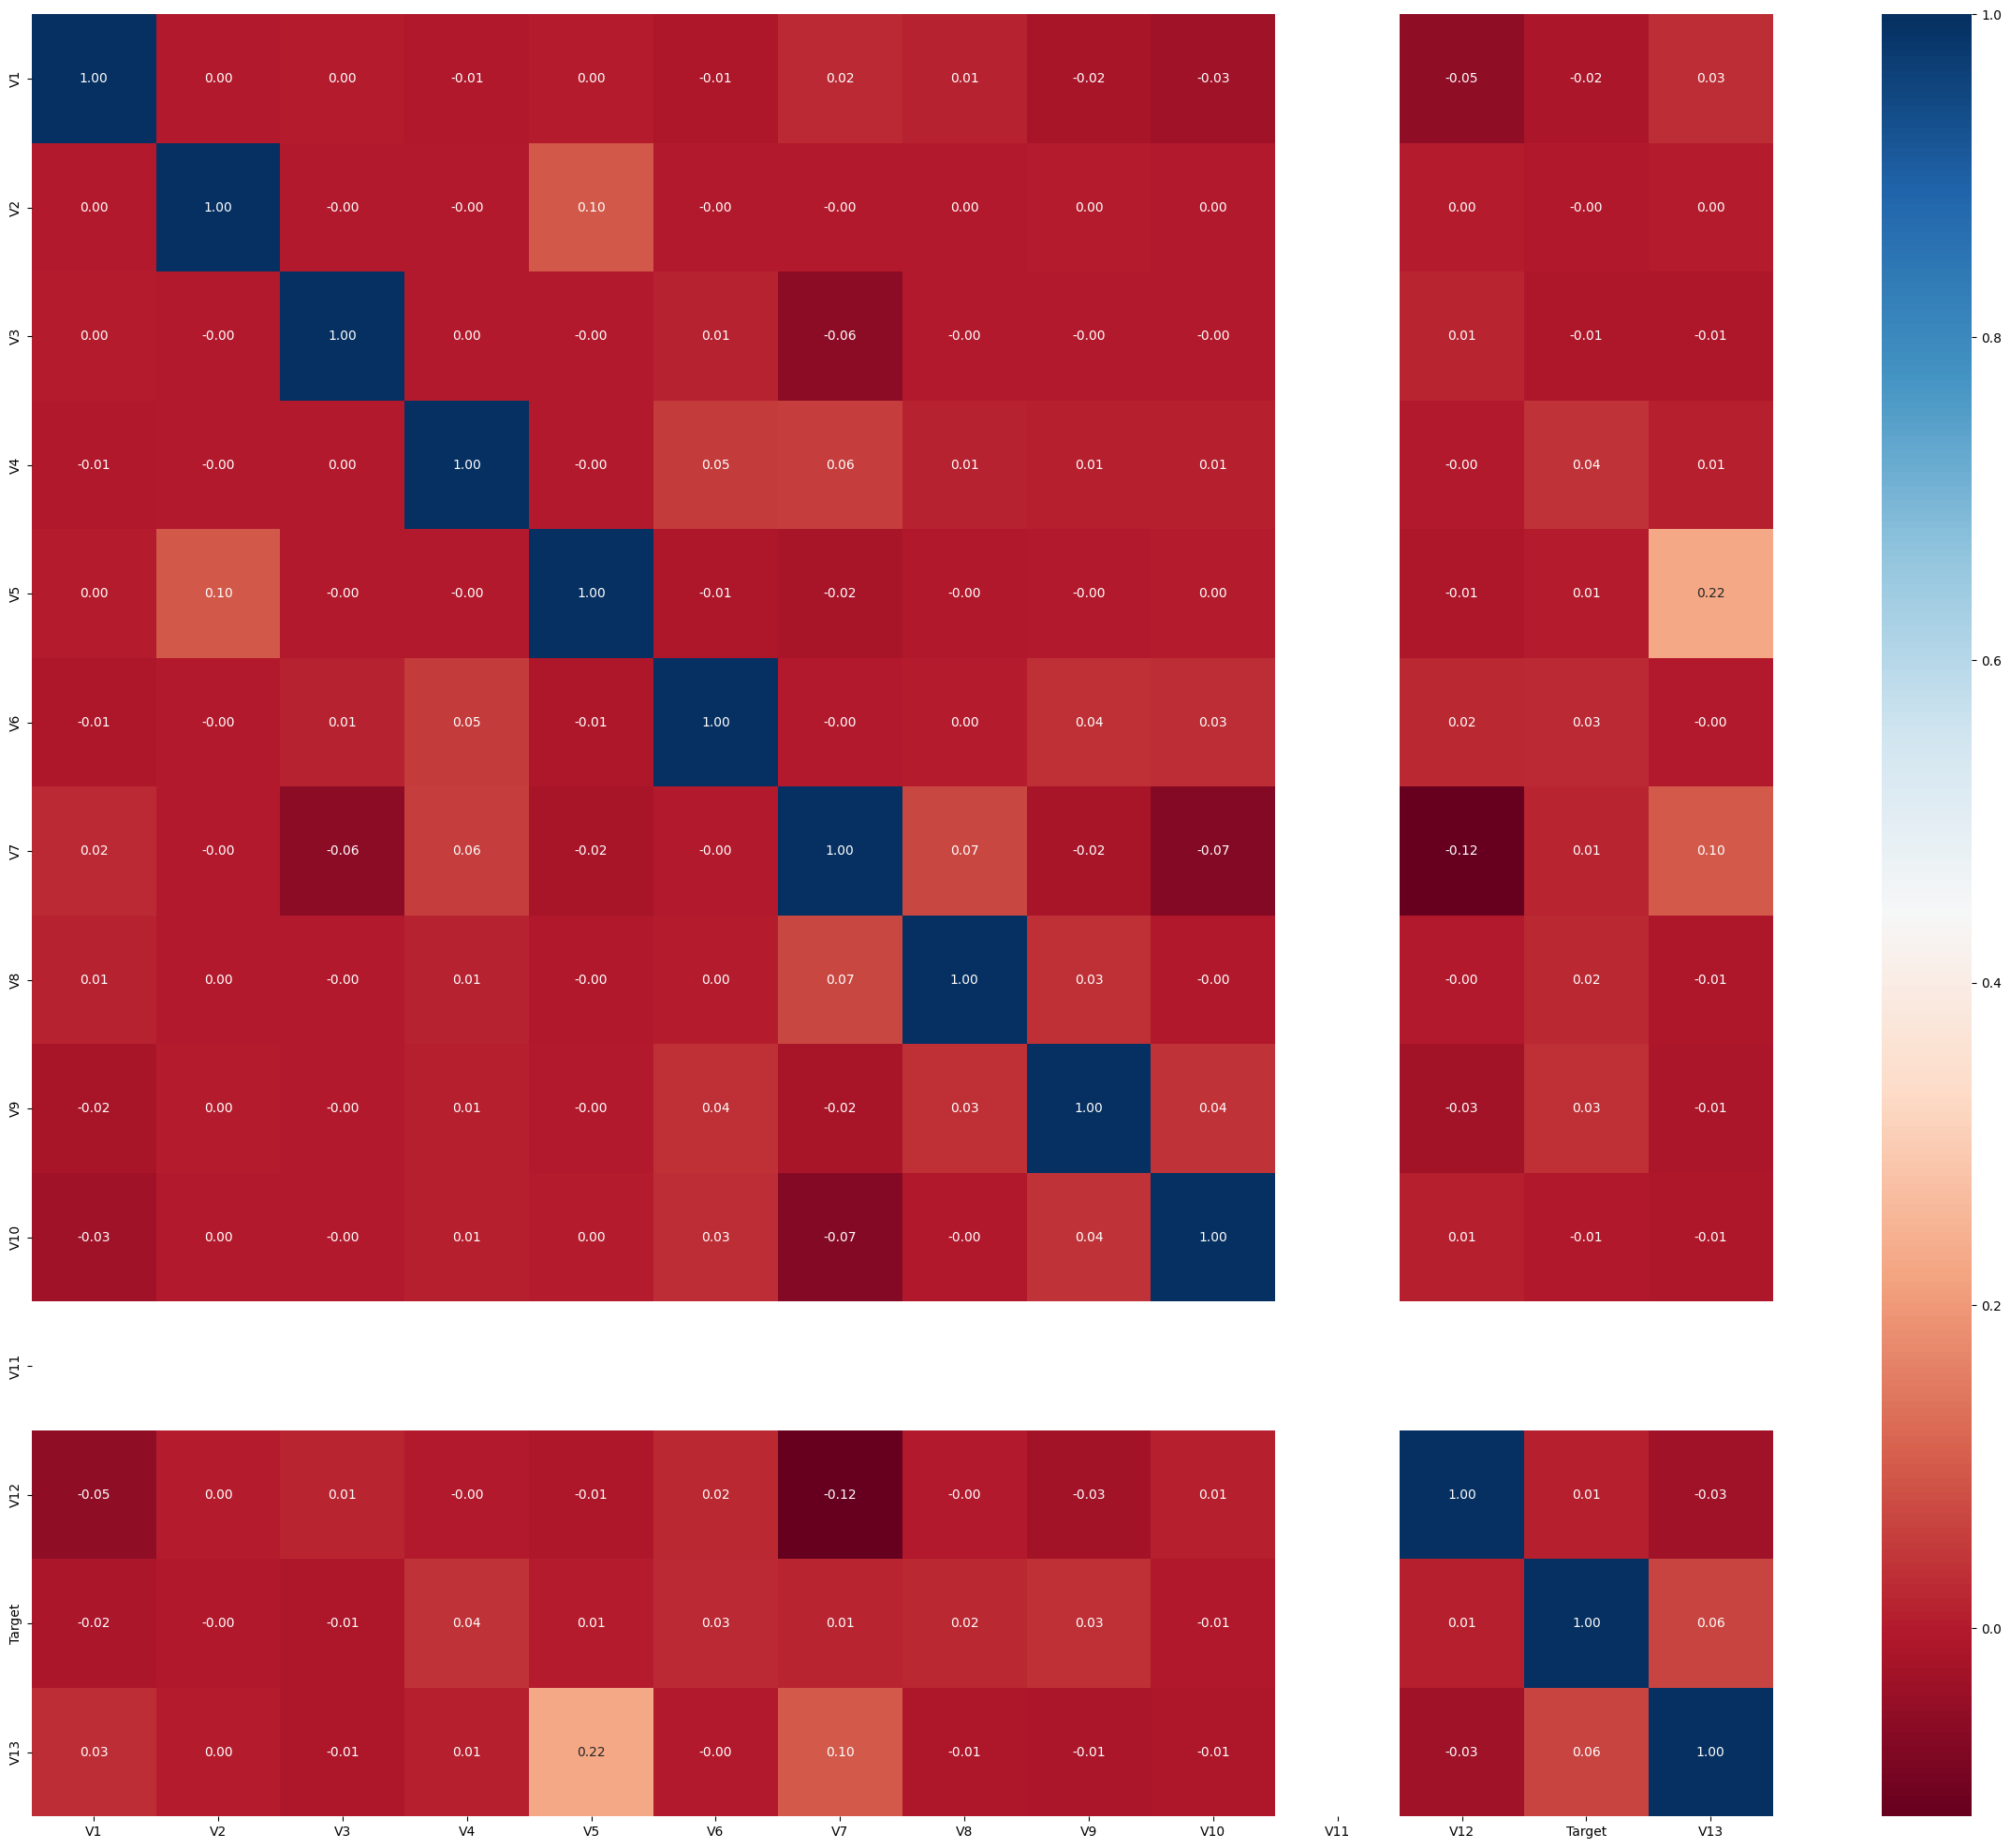

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(30, 25))

# plot the heatmap
sns.heatmap(corr_matrix, cmap="RdBu", annot=True, fmt=".2f")

# show the plot
plt.show()

In [25]:
encoded_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,1.204879,-0.892473,1.563516,3.010600,-1.055687,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,NaN,-1.330630
1,1.204879,0.089661,0.818514,6.258177,-0.885550,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,NaN,-1.330630
2,1.204879,0.056106,0.323594,-0.188505,-1.135892,1.798683,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,NaN,-1.330630
3,1.204879,0.162591,-1.479649,15.629294,1.650697,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,NaN,-1.330630
4,1.204879,1.014919,1.563516,3.010600,-1.055696,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,NaN,-1.330630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-1.495228,-0.166252,0.243287,-0.107726,-1.516486,1.909916,-0.131473,-1.609647,1.702531,1.388947,0.0,1.279336,NaN,0.985562
215848,-1.495228,-0.442464,-0.905115,-0.172355,-1.229088,1.909916,-0.131473,-1.609647,1.702531,-1.270139,0.0,1.279336,NaN,1.332991
215849,-1.495228,0.851527,-0.524055,-0.140034,-1.060165,1.909916,-0.131473,0.653512,-0.932993,-1.385991,0.0,1.279336,NaN,-1.153809
215850,-1.495228,0.085862,0.229624,-0.142619,-0.971971,1.909916,-0.131473,0.667492,-1.033679,0.447471,0.0,1.279336,NaN,-1.815901


In [26]:
encoded_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,Target,V13
0,-1.275582,-0.622881,0.263920,0.171262,-0.710766,1.885195,-0.131473,-1.701879,1.044878,1.263982,0.0,-1.664349,0.0,0.751683
1,0.621488,-0.494670,-0.866282,0.099867,-0.300635,-0.491730,-0.131473,1.325288,-0.520916,0.852411,0.0,-1.664349,0.0,0.773150
2,0.489048,0.082301,-1.708519,0.086165,0.936958,-0.721822,14.055012,1.400963,-1.185937,-0.517509,0.0,-1.664349,0.0,1.401912
3,-1.002307,-0.193372,-1.708519,-0.199266,0.350208,-0.721822,5.543121,1.427827,0.353335,1.801601,0.0,-1.664349,0.0,1.401912
4,0.080534,-1.691879,-1.708519,-0.191737,1.287536,-0.721822,5.543121,1.428542,0.353335,1.447865,0.0,-1.664349,0.0,1.401912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,0.080534,0.197102,0.688481,-0.172348,1.177271,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.0,0.522324
233629,0.080534,0.102439,0.149377,-0.140034,0.977774,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.0,0.522324
233630,0.080534,0.140572,-0.285054,-0.172348,1.056693,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.0,0.522324
233631,0.080534,1.687540,1.056267,-0.075406,-0.427943,-0.721455,11.217715,1.281390,1.659309,-1.725155,0.0,1.278083,0.0,0.766371


In [39]:
X = encoded_train.drop(['Target'], axis=1)
y = encoded_train['Target']

In [40]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,-1.275582,-0.622881,0.263920,0.171262,-0.710766,1.885195,-0.131473,-1.701879,1.044878,1.263982,0.0,-1.664349,0.751683
1,0.621488,-0.494670,-0.866282,0.099867,-0.300635,-0.491730,-0.131473,1.325288,-0.520916,0.852411,0.0,-1.664349,0.773150
2,0.489048,0.082301,-1.708519,0.086165,0.936958,-0.721822,14.055012,1.400963,-1.185937,-0.517509,0.0,-1.664349,1.401912
3,-1.002307,-0.193372,-1.708519,-0.199266,0.350208,-0.721822,5.543121,1.427827,0.353335,1.801601,0.0,-1.664349,1.401912
4,0.080534,-1.691879,-1.708519,-0.191737,1.287536,-0.721822,5.543121,1.428542,0.353335,1.447865,0.0,-1.664349,1.401912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233628,0.080534,0.197102,0.688481,-0.172348,1.177271,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.522324
233629,0.080534,0.102439,0.149377,-0.140034,0.977774,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.522324
233630,0.080534,0.140572,-0.285054,-0.172348,1.056693,1.986360,-0.131473,1.164155,-0.189388,-0.705046,0.0,1.278083,0.522324
233631,0.080534,1.687540,1.056267,-0.075406,-0.427943,-0.721455,11.217715,1.281390,1.659309,-1.725155,0.0,1.278083,0.766371


In [41]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
233628    0.0
233629    0.0
233630    0.0
233631    0.0
233632    0.0
Name: Target, Length: 233633, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
X = encoded_train.drop(['Target'], axis=1)
y = encoded_train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [61]:
from sklearn import metrics

In [62]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# assume X is your feature matrix and y is your target vector

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an instance of the XGBClassifier class
xgb = XGBClassifier()

# train the classifier on the training set
xgb.fit(X_train, y_train)

# make predictions on the test set
y_pred = xgb.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 0.998266526847433
Precision: [0.00528602 0.91919192 1.        ]
Recall: [1.         0.73684211 0.        ]
AUC Score: 0.8287125415788771
Score: 82.34265185087037


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model on the training set
rfc.fit(X_train, y_train)

# predict the target variable for the test set
y_pred = rfc.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 0.9980953196224881
Precision: [0.00528602 0.93888889 1.        ]
Recall: [1.         0.68421053 0.        ]
AUC Score: 0.8123843428239456
Score: 80.70983197537718


In [55]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create an AdaBoost classifier and fit it to the training data
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)
adaboost.fit(X_train, y_train)

# make predictions on the test set
y_pred = adaboost.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 0.9953132022171336
Precision: [0.00528602 0.68421053 1.        ]
Recall: [1.         0.21052632 0.        ]
AUC Score: 0.44945500910664743
Score: 44.41689860364739


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train the model on the training set
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
# calculate precision, recall, and AUC score
precision, recall, threshold = metrics.precision_recall_curve(y_test, y_pred)
auc_score = metrics.auc(recall, precision)
print("Precision:", precision)
print("Recall:", recall)
print("AUC Score:", auc_score)
score = max(0, 100*metrics.auc(precision, recall))
print("Score:", score)

Accuracy: 0.9969824726603462
Precision: [0.00528602 0.89552239 1.        ]
Recall: [1.         0.48582996 0.        ]
AUC Score: 0.6920351311349359
Score: 68.67491080647623


In [35]:
encoded_test = encoded_test.drop(columns=['Target'])

In [36]:
prob = xgb.predict_proba(encoded_test)
np.set_printoptions(precision=6, suppress=True)
# display the result
print(prob)

[[0.999896 0.000104]
 [0.999385 0.000615]
 [0.999973 0.000027]
 ...
 [0.999986 0.000014]
 [0.999998 0.000002]
 [0.999998 0.000002]]


In [37]:
encoded_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13
0,1.204879,-0.892473,1.563516,3.010600,-1.055687,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,-1.330630
1,1.204879,0.089661,0.818514,6.258177,-0.885550,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,-1.330630
2,1.204879,0.056106,0.323594,-0.188505,-1.135892,1.798683,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,-1.330630
3,1.204879,0.162591,-1.479649,15.629294,1.650697,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,-1.330630
4,1.204879,1.014919,1.563516,3.010600,-1.055696,-0.491730,-0.131473,1.327435,1.694181,0.846817,0.0,-1.664349,-1.330630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215847,-1.495228,-0.166252,0.243287,-0.107726,-1.516486,1.909916,-0.131473,-1.609647,1.702531,1.388947,0.0,1.279336,0.985562
215848,-1.495228,-0.442464,-0.905115,-0.172355,-1.229088,1.909916,-0.131473,-1.609647,1.702531,-1.270139,0.0,1.279336,1.332991
215849,-1.495228,0.851527,-0.524055,-0.140034,-1.060165,1.909916,-0.131473,0.653512,-0.932993,-1.385991,0.0,1.279336,-1.153809
215850,-1.495228,0.085862,0.229624,-0.142619,-0.971971,1.909916,-0.131473,0.667492,-1.033679,0.447471,0.0,1.279336,-1.815901


In [38]:
T_pred = xgb.predict(encoded_test)
T_pred_df = pd.DataFrame(T_pred, columns=['Target'])
prob_df = pd.DataFrame(prob, columns=['Porbability','Pred'])

In [39]:
prob_df

,Porbability,Pred
0,0.999896,0.000104
1,0.999385,0.000615
2,0.999973,0.000027
3,0.999549,0.000451
4,0.999847,0.000153
...,...,...
215847,0.873046,0.126954
215848,0.994485,0.005515
215849,0.999986,0.000014
215850,0.999998,0.000002


In [40]:
T_pred_df["Target"].value_counts()

Target
0    215723
1       129
Name: count, dtype: int64

In [41]:
T_pred_df

,Target
0,0
1,0
2,0
3,0
4,0
...,...
215847,0
215848,0
215849,0
215850,0


In [42]:
result = pd.concat([test["V2"],prob_df, T_pred_df], axis=1)

In [43]:
result = result.drop(columns=['Pred'])

In [44]:
result

,V2,Porbability,Target
0,TID198043,0.999896,0
1,TID312736,0.999385,0
2,TID308818,0.999973,0
3,TID321252,0.999549,0
4,TID420788,0.999847,0
...,...,...,...
215847,TID282851,0.873046,0
215848,TID250595,0.994485,0
215849,TID401706,0.999986,0
215850,TID312292,0.999998,0


In [45]:
result.to_csv('Resultsxgb1.csv',index = False)